# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Leemos los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verificamos la información para cada DataFrame creado.


## Plan de solución

Primero importamos la librería correspondiente, en este caso pandas. Luego de esto leemos los archivos 
como valores separados por comas (los archivos son csv, de acuerdo a la terminación de los mismos). 
Imprimimos las 5 primeras filas usando el método "head()" para verificar cual es el delimitador de estos archivos. 
Luego, de ser necesario, cambiamos el argumento del parámetro "sep=" por el delimitador correspondiente.
Leemos la información general de los data frames usando el método "info()", observando la presencia de datos nulos y el tipo de datos que tenemos en los dataframes. 

In [1]:
# Importar librerías
import pandas as pd

In [2]:
# Leer conjuntos de datos en los DataFrames
insta_ord = pd.read_csv("/datasets/instacart_orders.csv", sep=';')

prod = pd.read_csv("/datasets/products.csv", sep=';')

aisles = pd.read_csv("/datasets/aisles.csv", sep=';')

deps = pd.read_csv("/datasets/departments.csv", sep=';')

order_prod = pd.read_csv("/datasets/order_products.csv", sep=';')

In [3]:
# Mostrar información del DataFrame
display(insta_ord)
insta_ord.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# Mostrar información del DataFrame
display(prod)
prod.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# Mostrar información del DataFrame
display(aisles)
aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# Mostrar información del DataFrame
display(deps)
deps.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# Mostrar información del DataFrame
display(order_prod)
order_prod.info(show_counts=True)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Se importo la librería, se leyeron los data frames y se mostraron tomando en consideracion que el delimitador de todos los archivos es ";". Los titulos de las columnas concuerdan con el diccionario de datos, por lo que no se considero necesario cambiar los titulos por otros más concisos. 

Ahora con los archivos:

En el archivo instacart_orders.csv encontramos que la columna "days_since_prior_order" posee datos nulos. Este último tiene datos tipo "float", lo cual podria estar relacionado con la presencia de los datos nulos.

En el archivo products.csv encontramos que la columna "product_name" posee datos nulos. Este posee datos tipo "object", son los nombres de los productos.

En el archivo order_products.csv, encontramos que la columna "add_to_cart_order" posee datos nulos. Este último tiene datos tipo "float", lo cual podria estar relacionado con la presencia de los datos nulos.

Los datos de las demás columnas son enteros u objetos, dependiendo de la naturaleza de los mismos (si son numericos, como los ID, o nombres, de los departamentos y pasillos).

# Paso 2. Preprocesamiento de los datos

Preprocesamos los datos de la siguiente manera:

- Verificar y corrigir los tipos de datos.
- Identificar y completar los valores ausentes.
- Identificar y eliminar los valores duplicados.

## Plan de solución

En el paso anterior, usando "info()", se observo el tipo de datos de los dataframes. Los datos tipo float podrían ser transformados en enteros, luego de identificar los valores ausentes y determinar la razón de los mismos. Esto podría hacerse con "astype()", siempre y cuando se haya verificado usando la función "array_equal()" de la librería numpy. 

La identificacion de los valores ausentes se hará principalmente usando "isna()", "dropna()" y/o "fillna()", dependiendo de las circunstancias.

Los valores duplicados se eliminaran si son filas completas y se analizara con mayor detalle si son en determinadas columnas. Se usaran los métodos "duplicated().sum()", "value_counts()"


## Encuentrar y eliminar los valores duplicados.

### `orders` data frame

In [8]:
# Revisar si hay pedidos duplicados

display(insta_ord.duplicated().sum())
display(insta_ord["order_id"].value_counts().head(16))
display(insta_ord.value_counts().head(16))
insta_ord[insta_ord["order_id"] == 2125197]
insta_ord[insta_ord["order_id"] == 1782114]
display(insta_ord[(insta_ord["order_hour_of_day"] == 2) & (
    insta_ord["order_dow"] == 3)].value_counts().head(16))

15

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
2232988    2
408114     2
2282673    2
1919531    2
2160484    2
1918001    2
794638     2
1112182    2
467134     2
2845099    2
2357032    1
Name: order_id, dtype: int64

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
1918001   188546   14            3          2                  16.0                      2
1286742   183220   48            3          2                  4.0                       2
1112182   202304   84            3          2                  6.0                       2
2845099   31189    11            3          2                  7.0                       2
1919531   191501   32            3          2                  7.0                       2
2125

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
794638    50898    24            3          2                  2.0                       2
1919531   191501   32            3          2                  7.0                       2
2845099   31189    11            3          2                  7.0                       2
467134    63189    21            3          2                  2.0                       2
1112182   202304   84            3          2                  6.0                       2
408114    68324    4             3          2                  18.0                      2
1286742   183220   48            3          2                  4.0                       2
391768    57671    19            3          2                  10.0                      2
1021560   53767    3             3          2                  9.0                       2
1918001   188546   14            3          2                  16.0                      2
2160

Si existen lineas duplicadas. Las 15 ocurrieron un miércoles a las 2:00 a.m. Esto sugiere que debio ocurrir un error en la aplicación, generando estos duplicados por accidente.

In [9]:
# Eliminar los pedidos duplicados
insta_ord = insta_ord.drop_duplicates(subset="order_id").reset_index(drop=True)

In [10]:
# Volver a verificar si hay filas duplicadas
insta_ord.duplicated().sum()

0

In [11]:
# Volver a verificar únicamente si hay IDs duplicados de pedidos
display(insta_ord["order_id"].value_counts().head(16))
display(insta_ord[(insta_ord["order_hour_of_day"] == 2) & (
    insta_ord["order_dow"] == 3)].value_counts().head(16))

1048576    1
3389216    1
1100604    1
1275704    1
2337103    1
2301749    1
1251124    1
2175960    1
3352370    1
249647     1
3407657    1
2357032    1
1290019    1
1294113    1
3295006    1
1487677    1
Name: order_id, dtype: int64

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
191       176417   44            3          2                  6.0                       1
1983940   37173    4             3          2                  30.0                      1
2291746   40940    7             3          2                  3.0                       1
2282673   86751    49            3          2                  2.0                       1
2218116   35918    9             3          2                  8.0                       1
2190225   138285   18            3          2                  11.0                      1
2160484   107525   16            3          2                  30.0                      1
2132617   188324   12            3          2                  16.0                      1
2125197   14050    48            3          2                  3.0                       1
2061573   113852   11            3          2                  23.0                      1
2027

Habia 15 filas duplicadas. Todas ocurrieron el miércoles a las 2 de la madrugada. Suponiendo un error de la aplicación que duplicó las ordenes, los duplicados fueron eliminados.

### `products` data frame

In [12]:
# Verificar si hay filas totalmente duplicadas
prod.duplicated().sum()

0

In [13]:
# Verifica únicamente si hay IDs duplicadas de productos
prod["product_id"].duplicated().sum()

0

In [14]:
# Revisar únicamente si hay nombres duplicados de productos
prod["product_name"] = prod["product_name"].str.upper()
prod["product_name"].duplicated().sum()

1361

In [15]:
# Revisar si hay nombres duplicados de productos no faltantes
duplicated_not_null = prod[prod["product_name"].duplicated(
    keep=False) & prod["product_name"].notnull()]
display(duplicated_not_null.duplicated().sum())

duplicated_and_not_null = prod[prod["product_name"].duplicated(
) & prod["product_name"].notnull()]
display(duplicated_and_not_null.duplicated().sum())

0

0

Se buscaron filas duplicadas en el dataframe de products (prod). No se encontraron filas duplicadas, ni ID's duplicados de productos. 
En los nombres de los productos, si hay duplicados y estan relacionados con los valores ausentes. Esto lo observamos al verificar dos dataframes donde los datos ausentes no se encuentran pero en una mantenemos los datos duplicados y en en el otro no. En ambos dataframes no se observaron los datos nomres duplicados de productos. 

### `departments` data frame

In [16]:
# Revisar si hay filas totalmente duplicadas
print(deps.duplicated().sum())

0


In [17]:
# Revisar únicamente si hay IDs duplicadas de productos
print(deps["department_id"].duplicated().sum())

0


No se observaron duplicados, ni de filas ni de ID's. No se modificó el dataframe.

### `aisles` data frame

In [18]:
# Revisar si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [19]:
# Revisar únicamente si hay IDs duplicadas de productos
print(aisles["aisle_id"].duplicated().sum())

0


No se observaron duplicados, ni de filas ni de ID's. No se modificó el dataframe.

### `order_products` data frame

In [20]:
# Revisar si hay filas totalmente duplicadas
print(order_prod.duplicated().sum())

0


In [21]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_prod["order_id"].duplicated().sum())
print()
print(order_prod["order_id"].value_counts().head())
duplicated_tricky = order_prod[order_prod["product_id"].duplicated(keep=False)
                               & order_prod["add_to_cart_order"].notnull()]
print()
order_prod.info(show_counts=True)
print()
duplicated_tricky.info(show_counts=True)
print()
print(duplicated_tricky["order_id"].duplicated().sum())

4094961

61355      127
3308010    115
2136777    108
171934     104
1959075     98
Name: order_id, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4539125 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4539125 non-null  int64  
 1   product_id         4539125 non-null  int64  
 2   add_to_cart_order  4539125 non-null  float64
 3   reordered          4539125 non-null  int64  
dtypes: f

No se observó duplicados de filas. Si se observó "duplicados" en los ID's de las órdenes, aunque esto se puede explicar con que cada fila es un artículo único de cada pedido, por lo que es normal que las personas pidan más cosas en un pedido o inclusive más de un mismo articulo en un pedido. No se modificó el dataframe. Los datos ausentes no parecen ser la principal causa de los datos duplicados, pero si hay una diferencia cuando retiramos los datos nulos.

## Encontrar y eliminar los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [22]:
# Encontrar los valores ausentes en la columna 'product_name'
print(prod[prod["product_name"].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Hay 1258 datos ausentes. Todos tienen en común el ID del pasillo 100 y el ID del departamento 21.

In [23]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(prod[prod["product_name"].isna() & ~(prod["aisle_id"] == 100)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Cuando buscamos un dato ausente en otro id de pasillo que no sea 100, no encontramos un dato ausente.

In [24]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(prod[prod["product_name"].isna() & ~(prod["department_id"] == 21)])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Cuando buscamos un dato ausente en otro id del departamento que no sea 21, no encontramos un dato ausente.

In [25]:
# Usar las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles["aisle_id"] == 100])
print(deps[deps["department_id"] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Cuando buscamos un cualquier dato que se encuentre en en el departamento 21 o en el pasillo 100 no podemos encontrar nada de información.

In [26]:
# Completar los nombres de productos ausentes con 'Unknown'
prod["product_name"] = prod["product_name"].fillna("Unknown")
print(prod[prod["product_name"].isna()])
prod.info()

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


LLenamos los datos ausentes con "Unknown" con todos aquellos productos relacionados con el pasillo 100 y departamento 21. Verificamos que ya no hay datos ausentes en el Dataframe.

### `orders` data frame

In [27]:
# Encontrar los valores ausentes
 print(insta_ord[insta_ord["days_since_prior_order"].isna()])

In [28]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(insta_ord[insta_ord["days_since_prior_order"].isna()
      & ~(insta_ord["order_number"] == 1)])

print()
insta_ord["days_since_prior_order"] = insta_ord["days_since_prior_order"].fillna(
    0)
print(insta_ord[insta_ord["days_since_prior_order"].isna()])
print()
insta_ord.info()

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


No hay ningún valor ausente que no sea el primer pedido del cliente. Se llenó los datos ausentes con un "0" (cero), haciendo referencia a que no ha habido otro pedido anterior. No se osbervó un cambio en el el tipo de datos "float". 

### `order_products` data frame

In [29]:
# Encontrar los valores ausentes
order_prod.info(show_counts=True)
print()
print(order_prod[order_prod["add_to_cart_order"].isna()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN       

In [30]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_prod["add_to_cart_order"].min())
print()
print(order_prod["add_to_cart_order"].max())

1.0

64.0


Los valores máximos y mínimos son 64.0 y 1.0, respectivamente en la columna "add_to_cart_order". Luego del 64 podría ser necesario hacer otra orden para agregar nuevos productos.

In [31]:
# Guardar todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_ID_null = order_prod.loc[order_prod['add_to_cart_order'].isna(
), 'order_id']
order_ID_null.value_counts()

61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
2652650     1
2729254     1
2621907     1
888470      1
1677118     1
Name: order_id, Length: 70, dtype: int64

In [32]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
# Contar el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
pedidos_con_valor_ausente = order_prod[order_prod['add_to_cart_order'].isna(
)].groupby('order_id')

print(pedidos_con_valor_ausente["product_id"].value_counts())
print()
print(pedidos_con_valor_ausente["product_id"].value_counts().min())

order_id  product_id
9310      25753         1
61355     1087          1
          1203          1
          1700          1
          3390          1
                       ..
3383594   63            1
          15076         1
          15424         1
          46710         1
          49144         1
Name: product_id, Length: 836, dtype: int64

1


No todos los pedidos con valores ausentes tienen más de 64 productos. El valor mínimo  es 1. 

In [33]:
# Remplazar los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
import numpy as np
order_prod = order_prod.fillna(999)
order_prod.info(show_counts=True)


np.array_equal(order_prod['add_to_cart_order'],
               order_prod['add_to_cart_order'].astype('int'))
order_prod['add_to_cart_order'] = order_prod['add_to_cart_order'].astype('int')
order_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4545007 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


Se llenaron los datos ausentes usando "999", y luego de verificar con np.array_equal(), los datos fueron transformados a enteros.

## Conclusiones

Se procesaron los datos para tenerlos listos para los siguientes analisis. Se eliminaron las filas duplicadas, se aseguró el reemplazo o eliminación de los datos ausentes, de acuerdo a la naturaleza de los mismos. 


# Paso 3. Análisis de los datos

### Verificamos que los valores sean sensibles

In [34]:
print(sorted(insta_ord["order_hour_of_day"].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [35]:
print(sorted(insta_ord["order_dow"].unique()))

[0, 1, 2, 3, 4, 5, 6]


Los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla insta_ord oscilan entre 0 y 23 y 0 y 6, respectivamente.

### Para cada hora del día, ¿cuántas personas hacen órdenes?

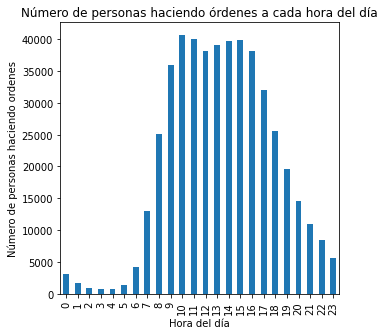

In [36]:
from matplotlib import pyplot as plt
person_per_hour = insta_ord.groupby('order_hour_of_day')[
    'user_id'].count().sort_index()
person_per_hour.plot(figsize=[5, 5], kind='bar', title="Número de personas haciendo órdenes a cada hora del día",
                     xlabel="Hora del día", ylabel="Número de personas haciendo ordenes")
plt.show()

Escribe aquí tus conclusiones
En la madrugada es cuando vemos el menor número de pedidos, y conforme avanza la mañana aumenta hasta que encontramos el punto máximo a las 10:00 a.m. para mantenerse similar hasta las 4:00 p.m. donde hay un declive.

### ¿Qué día de la semana compran víveres las personas?

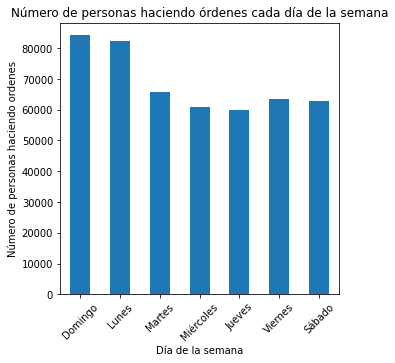

In [37]:
day_week = insta_ord.groupby('order_dow')[
    'user_id'].count().sort_index().reset_index()
day_week["order_dow"] = day_week["order_dow"].replace(
    {0: "Domingo", 1: "Lunes", 2: "Martes", 3: "Miércoles", 4: "Jueves", 5: "Viernes", 6: "Sábado"})
day_week.plot(x="order_dow", y="user_id", kind='bar',  rot=45, legend=False, figsize=[
              5, 5], title="Número de personas haciendo órdenes cada día de la semana", xlabel="Día de la semana", ylabel="Número de personas haciendo ordenes")
plt.show()

Escribe aquí tus conclusiones
Las personas compran los víveres usualmente los Domingos y Lunes, siendo el Jueves el día con menos compras.

### ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

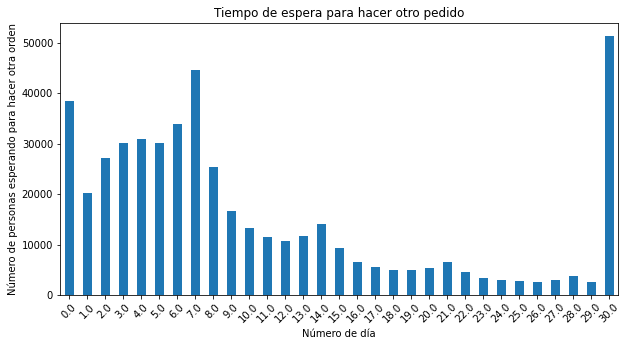

In [38]:
waiting_time = insta_ord.groupby('days_since_prior_order')[
    'user_id'].count().sort_index().reset_index()
waiting_time.plot(x="days_since_prior_order", y="user_id", kind='bar',  rot=45, legend=False, figsize=[
                  10, 5], title="Tiempo de espera para hacer otro pedido", xlabel="Número de día", ylabel="Número de personas esperando para hacer otra orden")
plt.show()

Escribe aquí tus conclusiones

Hay tres picos inportantes que destacan: en el mínimo pareciera que una cantidad importante vuelve a pedir el mismo día, tal vez debido a que se les olvido un producto o si han llegado al máximo permitido por pedido. En el siguiente pico observamos lo que parecieran ser clientes recurrentes pidiendo una nueva orden luego de 7 días, para reabastecerse de los productos consumidos. Finalizando, el último punto nos indica que muchos clientes no vuelven a hacer un pedido o pueden tardar más de 30 días en usar la app. Una posible explicación es que estos clientes unicamente hicieron un pedido usando alguna clase de cupon o descuento (en su primer pedido, por ejemplo) y sin este apoyo, no consideran rentable hacer uso de la aplicación.

### Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Trazaremos gráficos de barra para los dos días y describiremos las diferencias que veas.

In [39]:
mi_sab_3 = insta_ord[(insta_ord["order_dow"] == 3)][[
    "order_hour_of_day"]].value_counts().sort_index()
mi_sab_6 = insta_ord[(insta_ord["order_dow"] == 6)][[
    "order_hour_of_day"]].value_counts().sort_index()

In [40]:
mi_sab_concat = pd.concat([mi_sab_3, mi_sab_6], axis=1)
mi_sab_concat.columns = ['Miercoles', 'Sabado']
mi_sab_concat = mi_sab_concat.reset_index()
mi_sab_concat.head()

,order_hour_of_day,Miercoles,Sabado
0,0,373,464
1,1,215,254
2,2,106,177
3,3,101,125
4,4,108,118


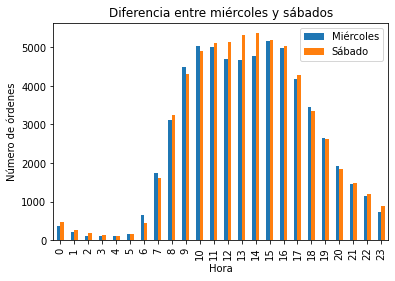

In [41]:
mi_sab_concat.plot(x='order_hour_of_day',
                   kind='bar',
                   title='Diferencia entre miércoles y sábados',
                   xlabel='Hora',
                   ylabel='Número de órdenes')
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Pareciera que hay diferencias significativas entre las 11:00 a.m. y 14:00 p.m. con una disminución de órdenes los miércoles a comparación de los sábados.

### ¿Cuál es la distribución para el número de pedidos por cliente?

In [57]:
num_per_user = insta_ord.groupby('user_id')['order_id'].count().sort_index()
display(num_per_user)

user_id
2         2
4         2
5         1
6         2
7         2
         ..
206203    1
206206    7
206207    5
206208    9
206209    2
Name: order_id, Length: 157437, dtype: int64

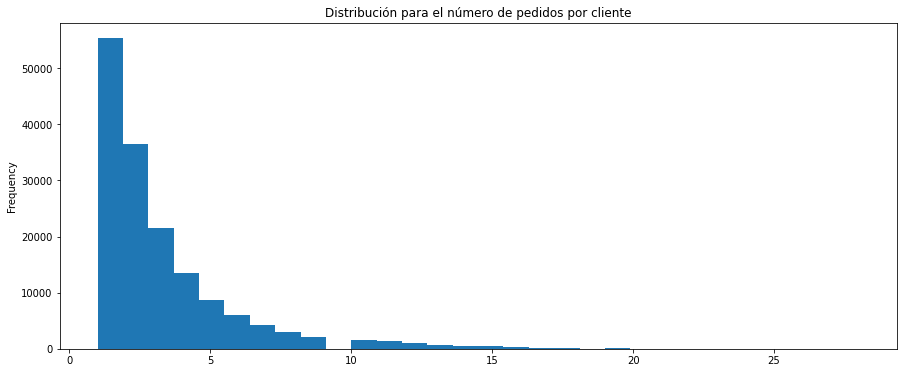

In [43]:
num_per_user.plot(kind='hist', title="Distribución para el número de pedidos por cliente",
                  bins=30, figsize=[15, 6], ylabel="Cantidad de clientes")
plt.show()

La gran mayoría de las personas no hacen más que unas pocos pedidos (Entre 1 y 5 pedidos). Pocos mantienen como hábito el seguir pidiendo. Este resultado parece estar relacionado con el de cuanto tiempo esperan los clientes en volver a pedir. 

### ¿Cuáles son los 20 productos más populares (mostrar su ID y nombre)?

In [44]:
popular_product = order_prod[["product_id"]
                             ].value_counts().reset_index().iloc[0:20, :]
popular_product.columns = ['product_id', 'quantity']
display(popular_product.head(25))  # Se verifica el tamaño del dataframe

,product_id,quantity
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [45]:
produ_name = prod[["product_id", "product_name"]]

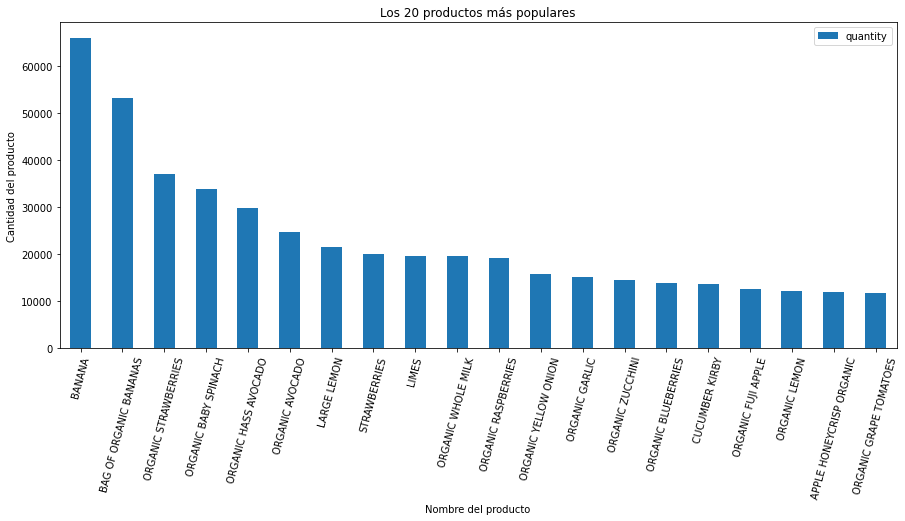

In [46]:
pop_prod_name = popular_product.merge(produ_name, on="product_id", how="left")
pop_prod_name.plot(x='product_name', y='quantity', kind='bar',
                   title="Los 20 productos más populares",
                   alpha=1, figsize=[15, 6], xlabel="Nombre del producto", ylabel="Cantidad del producto", rot=75)
plt.show()

En su mayoría los clientes piden productos orgánicos, sobretodo productos vegetales.

### ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [76]:
prod_per_order = order_prod.groupby("order_id")["product_id"].count()
prod_per_order_value_counts = prod_per_order.value_counts().sort_index().reset_index()
prod_per_order_value_counts.columns = ['num_objects_per_order', 'frequency']
prod_per_order_mean = prod_per_order_value_counts["num_objects_per_order"].mean(
)

display(prod_per_order)
display(prod_per_order_value_counts)
display(prod_per_order_mean)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

,num_objects_per_order,frequency
0,1,21847
1,2,26292
2,3,29046
3,4,31054
4,5,31923
...,...,...
85,98,1
86,104,1
87,108,1
88,115,1


47.21111111111111

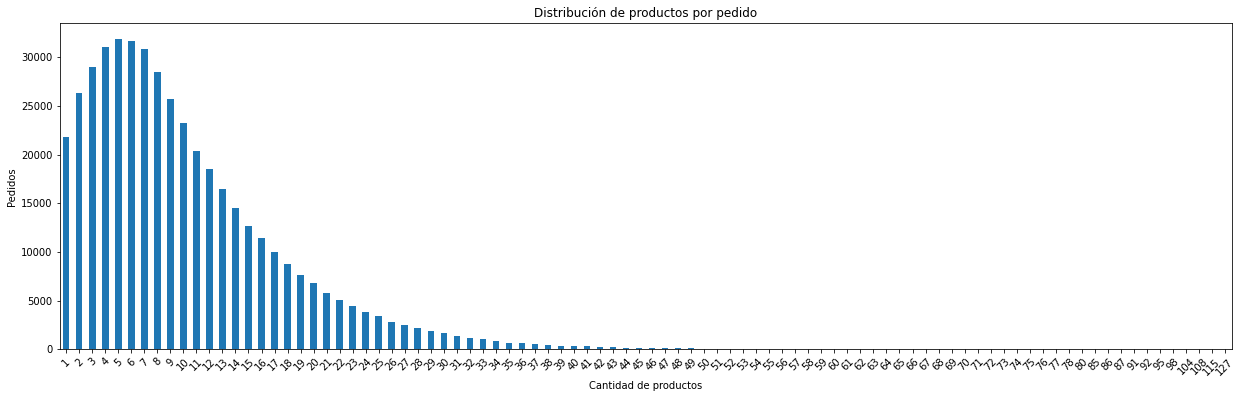

In [77]:
prod_per_order_value_counts.plot(kind='bar', x="num_objects_per_order", y="frequency",
                                 title="Distribución de productos por pedido", rot=45, legend=False,
                                 figsize=[21, 6], xlabel="Cantidad de productos", ylabel="Pedidos")
plt.show()

El promedio de las órdenes tiene 47 productos. Sin embargo, este resultado está sesgado, debido a los valores atípicos, como el único pedido que tiene hasta 127 productos. En su mayoría, los clientes eligen entre 4-7 productos por pedido. 

### ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (mostrando sus nombres e IDs de los productos)?

In [50]:
popular_product_freq = order_prod[(order_prod["reordered"] == 1)][[
    "product_id"]].value_counts().reset_index().iloc[0:20, :]
popular_product_freq.columns = ['product_id', 'quantity']

print(popular_product_freq.head(25))  # Se verifica el tamaño del dataframe

    product_id  quantity
0        24852     55763
1        13176     44450
2        21137     28639
3        21903     26233
4        47209     23629
5        47766     18743
6        27845     16251
7        47626     15044
8        27966     14748
9        16797     13945
10       26209     13327
11       22935     11145
12       24964     10411
13       45007     10076
14       49683      9538
15       28204      8989
16        8277      8836
17       39275      8799
18        5876      8412
19       49235      8389


In [51]:
produ_name = prod[["product_id", "product_name"]]

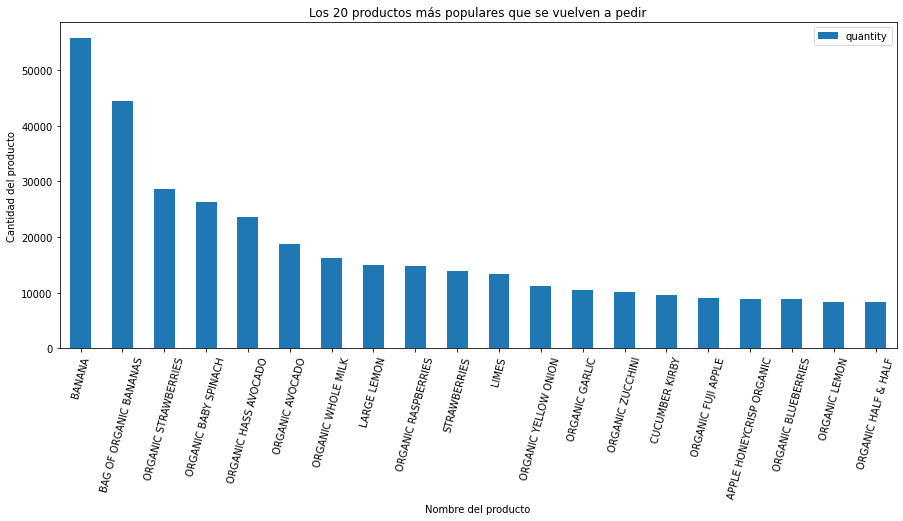

In [52]:
pop_prod_freq_named = popular_product_freq.merge(
    produ_name, on="product_id", how="left")
pop_prod_freq_named.plot(x='product_name', y='quantity', kind='bar',
                         title="Los 20 productos más populares que se vuelven a pedir",
                         alpha=1, figsize=[15, 6], xlabel="Nombre del producto", ylabel="Cantidad del producto", rot=75)
plt.show()

En su mayoría los clientes piden de nuevo productos orgánicos. Los productos son similares a los 20 más populares aunque con ligeras diferencias en el ranking.

### Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [53]:
# Primero arreglamos los datos del dataframe donde tenemos el ID del producto y
# si se ha pedido de nuevo dicho producto o no, para contabilizar el total de pedidos de los productos
total_prod = order_prod[["product_id"]].value_counts().reset_index()
total_prod.columns = ['product_id', 'total_quantity']

# Segundo, arreglamos los datos del dataframe donde tenemos el ID del producto y lo filtramos con los productos
# que se han pedido anteriormente.
order_prod_again = order_prod[(order_prod["reordered"] == 1)][[
    "product_id"]].value_counts().reset_index()
order_prod_again.columns = ['product_id', 'quantity_reordered']

In [54]:
# Tercero, unimos los datos de ambos dataframes usando el ID del producto como columna en común.
order_prod_proportion = total_prod.merge(
    order_prod_again, on="product_id", how="left")

# Cuarto, unimos los datos del anterior dataframe con los del dataframe que tiene el nombre de los productos
# de acuerdo a el ID de los mismos. Usaamos el ID del producto como columna en común.
# Todos los "NA" fueron reemplazados con cero.
produ_name = prod[["product_id", "product_name"]]
order_prod_proportion_names = order_prod_proportion.merge(
    produ_name, on="product_id", how="left").fillna(0)

In [55]:
# Quinto, se  hizo una nueva columna para la tasa de repetición del pedido.
order_prod_proportion_names["proportion_of_reordered"] = order_prod_proportion_names["quantity_reordered"] / \
    order_prod_proportion_names["total_quantity"]
display(order_prod_proportion_names)

,product_id,total_quantity,quantity_reordered,product_name,proportion_of_reordered
0,24852,66050,55763.0,BANANA,0.844254
1,13176,53297,44450.0,BAG OF ORGANIC BANANAS,0.834006
2,21137,37039,28639.0,ORGANIC STRAWBERRIES,0.773212
3,21903,33971,26233.0,ORGANIC BABY SPINACH,0.772217
4,47209,29773,23629.0,ORGANIC HASS AVOCADO,0.793639
...,...,...,...,...,...
45568,5836,1,1.0,ARCTIC D COD LIVER OIL LEMON,1.000000
45569,43573,1,0.0,WHISK- 10 INCH,0.000000
45570,43570,1,0.0,QUESO COTIJA,0.000000
45571,36174,1,0.0,WHOLE PINTO BEANS,0.000000


Obtuvimos un dataframe con una columna que muestra la tasa del re-ordenado de cada producto. En el dataframe se muestran el id del producto, el nombre del producto y la tasa de repetición del pedido.

### Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
# Primero fusionaremos los dataframes de instacart_orders con el de order_products, usando order_id como columna en común.
user_order_prod_merger = order_prod.merge(insta_ord, on="order_id", how="left")
# Verificamos que la fusión sea correcta.
user_order_prod_merger.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,567889,1560,1,1,129474,16,1,13,14.0
2,2261212,26683,1,1,47476,5,6,9,13.0
3,491251,8670,35,1,134505,27,6,13,9.0
4,2571142,1940,5,1,155995,22,5,13,5.0


In [57]:
# Luego, agrupamos los datos usando la columna user_id, usando el promedio de los valores de reordered.
groupby_data = user_order_prod_merger.groupby('user_id')['reordered'].mean()
# Observamos los resultados, obteniendo un objeto series con la tasa de repeticion de pedido para cada usuario,
# de acuerdo a su user_id.
groupby_data

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Obtuvimos un objeto series que muestra muestra la tasa del re-ordenado los pedidos de los clientes.

### ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [58]:
# Primero fusionaremos los dataframes de order_products con el de produ_name (anteriormente creado), usando product_id como columna en común.
prod_merger = produ_name.merge(
    order_prod[order_prod["add_to_cart_order"] == 1], on="product_id", how="right")
print(prod_merger)
prod_merger.info()

        product_id                                       product_name  \
0             1560                                         BAG OF ICE   
1            26683  CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...   
2            37553                          ICED COFFEE LIGHTLY SWEET   
3            10017                                      TILAPIA FILET   
4             8518                                  ORGANIC RED ONION   
...            ...                                                ...   
450041       46175                              HALF BAKED® ICE CREAM   
450042       20842                              TOTAL 0% GREEK YOGURT   
450043       28576                              VANILLA BEAN CHIA POD   
450044       10017                                      TILAPIA FILET   
450045       24852                                             BANANA   

        order_id  add_to_cart_order  reordered  
0         567889                  1          1  
1        2261212         

In [59]:
print(prod_merger["product_name"].value_counts().reset_index().head(20))

                          index  product_name
0                        BANANA         15562
1        BAG OF ORGANIC BANANAS         11026
2            ORGANIC WHOLE MILK          4363
3          ORGANIC STRAWBERRIES          3946
4          ORGANIC HASS AVOCADO          3390
5          ORGANIC BABY SPINACH          3336
6               ORGANIC AVOCADO          3044
7                  SPRING WATER          2336
8                  STRAWBERRIES          2308
9           ORGANIC RASPBERRIES          2024
10   SPARKLING WATER GRAPEFRUIT          1914
11          ORGANIC HALF & HALF          1797
12                  LARGE LEMON          1737
13                         SODA          1733
14     ORGANIC REDUCED FAT MILK          1397
15                        LIMES          1370
16                HASS AVOCADOS          1340
17  ORGANIC REDUCED FAT 2% MILK          1310
18                  HALF & HALF          1309
19                  RASPBERRIES          1246


El listado de los 20 principales artículos que la gente pone en su carrito es muy similar al de los productos populares. La mayoría son orgánicos. Podría ser que estos son los primeros productos que ven en la aplicación y por lo tanto, son los primeros que son guardados. O tambien podría ser que la aplicación es más popular en el estrato socioeconómico que puede adquirir y preocuparse de que sus alimentos son orgánicos.

### Conclusion general del proyecto:

La aplicación es usualmente usada durante el día y entre el domingo y el lunes. 
Las compras semanales se mantienen en una importante cantidad de clientes, 
aunque la gran mayoría de las personas no hacen más que unas pocos pedidos. Pocos mantienen como habito el seguir pidiendo.
La gran mayoría de los pedidos tiene alrededor de 4-7 productos por pedido. 
La aplicación instacart tiene mayores ventas en los productos orgánicos. Los platanos resultaron el producto estrella lo cual tiene sentido, siendo la comida rápida biodegradable por excelencia.